# Config

In [30]:

from PIL import Image
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from datasets import load_dataset

# View

In [32]:
file_path = "E:/DL-for-Knee-decease-diagnosis/dataset/train/normal/9001695L.png"
file_size_bytes = os.path.getsize(file_path)
file_size_kb = file_size_bytes / 1024  # Chuyển đổi sang kilobytes

print(f"Size: {file_size_kb:.2f} KB ({file_size_bytes} bytes)")

Size: 18.36 KB (18797 bytes)


In [27]:
image_color = cv.imread(file_path, cv.IMREAD_COLOR)


In [33]:
image_color.shape

(224, 224, 3)

In [31]:
image_color.size 

150528

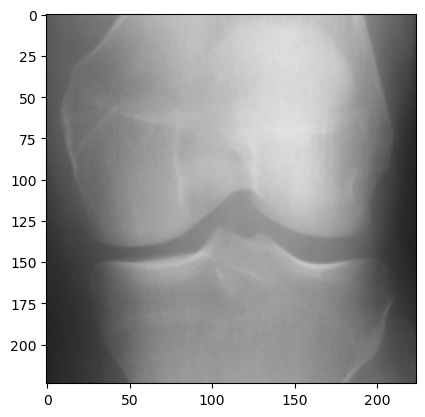

In [29]:
plt.imshow(image_color)

In [36]:
dataset_path = 'E:/DL-for-Knee-decease-diagnosis/dataset/train'

train_dataset = load_dataset("imagefolder", data_dir=dataset_path)

Resolving data files:   0%|          | 0/7293 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [39]:
train_dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 7293
    })
})

In [45]:
# Chọn một file ảnh từ folder "normal"
image_path = os.path.join(dataset_path, 'normal', os.listdir(os.path.join(dataset_path, 'normal'))[0])

# Mở ảnh bằng PIL
# image = Image.open(image_path)
image = cv.imread(image_path, cv.IMREAD_COLOR)

print(f"Shape: {image.shape}")
# In kích thước của ảnh (chiều rộng, chiều cao)
print(f"Kích thước ảnh: {image.size}")

file_size_bytes = os.path.getsize(image_path)
file_size_kb = file_size_bytes / 1024  # Chuyển đổi sang kilobytes

print(f"Size: {file_size_kb:.2f} KB ({file_size_bytes} bytes)")

Shape: (224, 224, 3)
Kích thước ảnh: 150528
Size: 18.36 KB (18797 bytes)


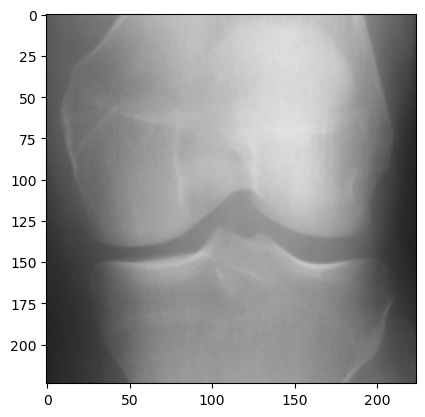

In [43]:
plt.imshow(image)

Shape (xám): (224, 224)


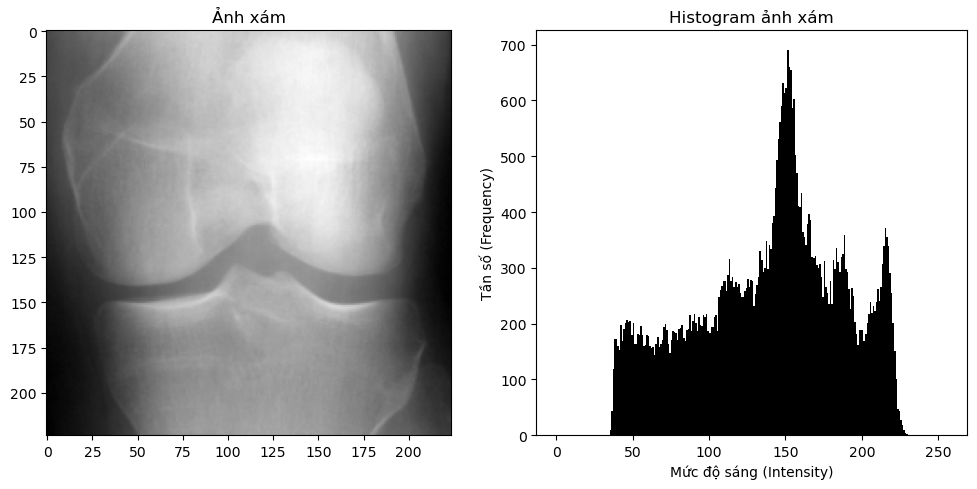

In [46]:
# Bước 1: Chuyển ảnh sang grayscale (ảnh xám)
image_gray = cv.cvtColor(image_color, cv.COLOR_BGR2GRAY)

# Kiểm tra shape của ảnh xám
print(f"Shape (xám): {image_gray.shape}")

# Bước 2: Vẽ biểu đồ histogram cho ảnh grayscale
plt.figure(figsize=(10, 5))

# Vẽ ảnh grayscale
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Ảnh xám')

# Vẽ histogram
plt.subplot(1, 2, 2)
plt.hist(image_gray.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram ảnh xám')
plt.xlabel('Mức độ sáng (Intensity)')
plt.ylabel('Tần số (Frequency)')

plt.tight_layout()
plt.show()

# Histogram


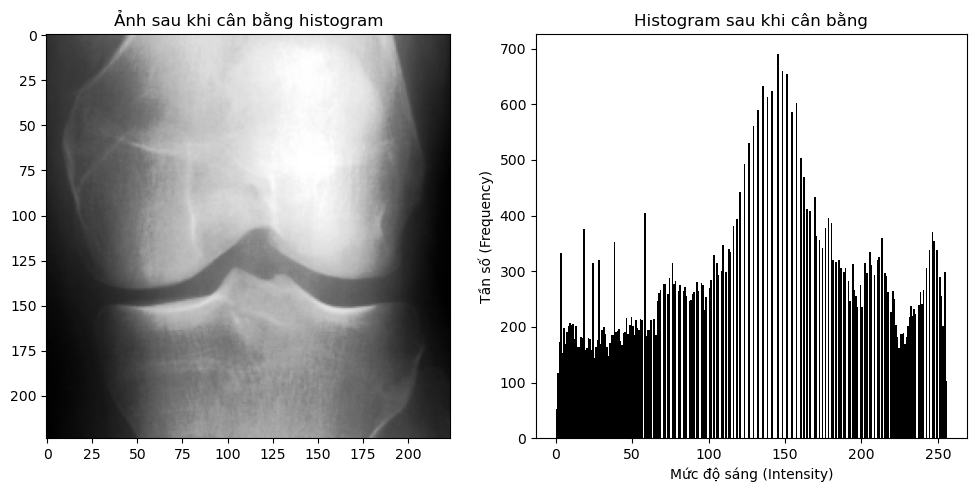

In [47]:
# Cân bằng histogram cho ảnh xám
image_gray_equalized = cv.equalizeHist(image_gray)

# Hiển thị ảnh đã được cân bằng histogram và biểu đồ histogram
plt.figure(figsize=(10, 5))

# Hiển thị ảnh đã cân bằng
plt.subplot(1, 2, 1)
plt.imshow(image_gray_equalized, cmap='gray')
plt.title('Ảnh sau khi cân bằng histogram')

# Vẽ histogram của ảnh đã cân bằng
plt.subplot(1, 2, 2)
plt.hist(image_gray_equalized.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram sau khi cân bằng')
plt.xlabel('Mức độ sáng (Intensity)')
plt.ylabel('Tần số (Frequency)')

plt.tight_layout()
plt.show()


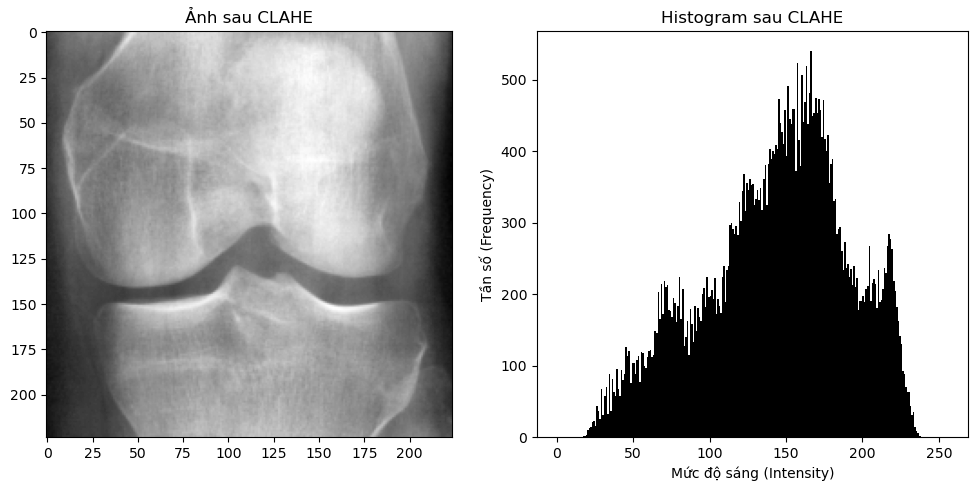

In [48]:
# Áp dụng CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
image_clahe = clahe.apply(image_gray)

# Hiển thị ảnh CLAHE và histogram
plt.figure(figsize=(10, 5))

# Hiển thị ảnh sau CLAHE
plt.subplot(1, 2, 1)
plt.imshow(image_clahe, cmap='gray')
plt.title('Ảnh sau CLAHE')

# Vẽ histogram của ảnh CLAHE
plt.subplot(1, 2, 2)
plt.hist(image_clahe.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram sau CLAHE')
plt.xlabel('Mức độ sáng (Intensity)')
plt.ylabel('Tần số (Frequency)')

plt.tight_layout()
plt.show()


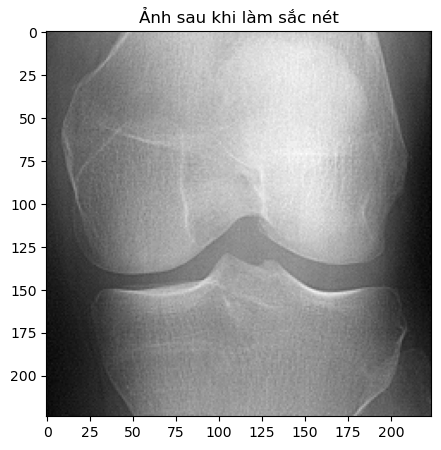

In [49]:
# Kernel để làm sắc nét ảnh
kernel = np.array([[0, -1, 0], 
                   [-1, 5,-1], 
                   [0, -1, 0]])

# Áp dụng kernel để làm sắc nét ảnh
image_sharpen = cv.filter2D(image_gray, -1, kernel)

# Hiển thị ảnh đã được làm sắc nét
plt.figure(figsize=(5, 5))
plt.imshow(image_sharpen, cmap='gray')
plt.title('Ảnh sau khi làm sắc nét')
plt.show()


# Solve